In [1]:
cd ../dataset/Housing

[Errno 2] No such file or directory: '../dataset/Housing'
/home/arun/HPCC-covid19


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Pre-processing

In [3]:
#read housing.csv file
df = pd.read_csv('/home/arun/Desktop/dataset/Housing/housing.csv')

In [4]:
df.dropna()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
7,7049667879,https://auburn.craigslist.org/apa/d/valley-clu...,auburn,https://auburn.craigslist.org,930,apartment,1252,3,2.0,1,...,1,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00U0U_6VTJdM7e3D...,Details: Beds: 3 Baths: 2 Sqft: 1252 Rent: $93...,32.8113,-85.1749,al
9,7049667852,https://auburn.craigslist.org/apa/d/valley-pri...,auburn,https://auburn.craigslist.org,895,apartment,1118,2,2.0,1,...,1,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00o0o_hYCEZa5JCv...,Whether you are searching for a home to share ...,32.8113,-85.1749,al
10,7049667981,https://auburn.craigslist.org/apa/d/valley-was...,auburn,https://auburn.craigslist.org,705,apartment,760,1,1.0,1,...,1,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00P0P_7jWrJLpPFH...,Details: Beds: 1 Baths: 1 Sqft: 760 Rent: $705...,32.8113,-85.1749,al
11,7037871624,https://auburn.craigslist.org/apa/d/auburn-spa...,auburn,https://auburn.craigslist.org,1000,apartment,2097,3,2.0,1,...,1,0,0,w/d in unit,attached garage,https://images.craigslist.org/00808_8HcLImoydi...,Country living close to town. On just around 3...,38.9829,-121.0940,al
17,7049885081,https://bham.craigslist.org/apa/d/birmingham-s...,birmingham,https://bham.craigslist.org,850,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00x0x_aHOsnIW1PQ...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384968,7028099401,https://wyoming.craigslist.org/apa/d/sheridan-...,wyoming,https://wyoming.craigslist.org,824,apartment,1174,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01414_gHw1fJj4iP...,Peak Apartments - a âGreenâ community - is...,44.8064,-106.9900,wy
384969,7027870647,https://wyoming.craigslist.org/apa/d/laramie-f...,wyoming,https://wyoming.craigslist.org,1120,apartment,850,2,2.0,1,...,1,0,1,w/d in unit,off-street parking,https://images.craigslist.org/00J0J_1lOadXi8wy...,A Full-unit of a 2 Bedroom in the Verge Apartm...,41.3136,-105.5550,wy
384974,7026010527,https://wyoming.craigslist.org/apa/d/rock-spri...,wyoming,https://wyoming.craigslist.org,899,apartment,950,2,1.0,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00101_8WijiIwWq6...,The Preserve at Rock Springs offers 9 differen...,41.5961,-109.2540,wy
384975,7026008298,https://wyoming.craigslist.org/apa/d/rock-spri...,wyoming,https://wyoming.craigslist.org,699,apartment,650,1,1.0,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00101_8WijiIwWq6...,Don't miss your chance living in the best apar...,41.5961,-109.2540,wy


In [5]:
df1 = df[df.price >= 100 ].sort_values(by = ['price'])
df1.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.827630e+05,3.827630e+05,3.827630e+05,382763.000000,382763.000000,382763.000000,382763.000000,382763.000000,382763.000000,382763.000000,382763.000000,380853.000000,380853.000000
mean,7.040984e+09,8.876752e+03,1.059630e+03,1.905006,1.480491,0.727578,0.708501,0.731622,0.082035,0.012927,0.047805,37.235727,-92.688048
std,8.800657e+06,4.475087e+06,1.920396e+04,3.503802,0.616467,0.445206,0.454453,0.443116,0.274419,0.112960,0.213354,5.547876,16.535795
min,7.003808e+09,1.000000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035980e+09,8.110000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.460100,-99.796100
50%,7.043322e+09,1.041000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.662500,-87.698600
75%,7.048428e+09,1.399000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.141000,-81.179600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [6]:
df1 = df[np.logical_and(df.price >= 500, df.price <= 10000)]
df1 = df1[np.logical_and(df1.sqfeet >= 300, df1.sqfeet <= 10000)]
df1 = df1[np.logical_and(df1.beds >= 1, df1.beds <= 4)]
df1 = df1[np.logical_and(df1.baths >= 1, df1.baths <= 4)]

df1 = df1[df1.type == 'house']
print(df1.shape)
df1.describe()

(29650, 22)


,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.965000e+04,29650.000000,29650.000000,29650.000000,29650.000000,29650.000000,29650.000000,29650.000000,29650.000000,29650.000000,29650.000000,29273.000000,29273.000000
mean,7.039966e+09,1370.914941,1496.420405,2.935110,1.825261,0.497808,0.538617,0.651400,0.068533,0.019393,0.083103,37.584353,-94.217376
std,9.780155e+06,823.148283,589.939889,0.712066,0.643507,0.500004,0.498515,0.476535,0.252662,0.137904,0.276042,5.892582,17.775818
min,7.004060e+09,500.000000,300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-159.519000
25%,7.034437e+09,811.000000,1094.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.841400,-105.070000
50%,7.042284e+09,1195.000000,1400.000000,3.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.423200,-88.890100
75%,7.048089e+09,1695.000000,1800.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.538500,-81.525800
max,7.051282e+09,9810.000000,9999.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.993700,172.633000


In [7]:
# get the count of each type of house
df1['beds'].value_counts().sort_index()

1      769
2     6234
3    16799
4     5848
Name: beds, dtype: int64

In [8]:
# remove duplicate rows
df1.drop_duplicates(inplace = True)
df1.shape

(29650, 22)

In [9]:
# check for dupliate rows
df1.duplicated().sum()

0

In [10]:
df1['type'].value_counts().sort_index()

house    29650
Name: type, dtype: int64

In [11]:
# datatypes of each variable of dataframe
df1.dtypes


id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

# Visualization

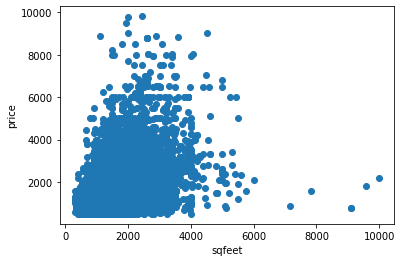

In [12]:
# plot a graph for price vs sqfeet
plt.scatter(df1['sqfeet'], df1['price'])
plt.xlabel('sqfeet')
plt.ylabel('price')
plt.show()

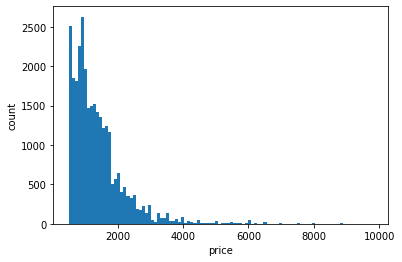

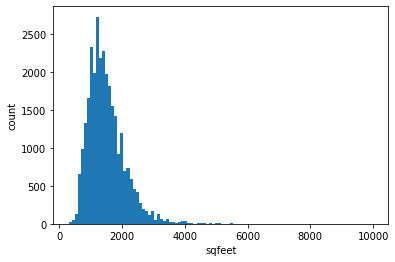

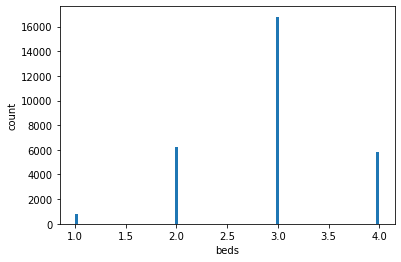

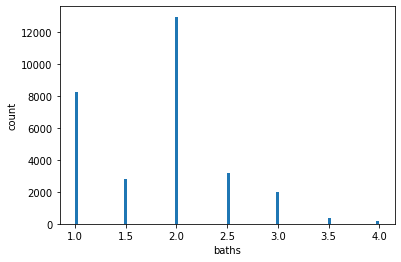

In [13]:
# histogram of price between 500 and 3000
plt.hist(df1['price'], bins = 100)
plt.xlabel('price')
plt.ylabel('count')
plt.show()

# histogram of sqfeet
plt.hist(df1['sqfeet'], bins = 100)
plt.xlabel('sqfeet')
plt.ylabel('count')
plt.show()

# histogram of beds
plt.hist(df1['beds'], bins = 100)
plt.xlabel('beds')
plt.ylabel('count')
plt.show()

# distribution of baths
plt.hist(df1['baths'], bins = 100)
plt.xlabel('baths')
plt.ylabel('count')
plt.show()



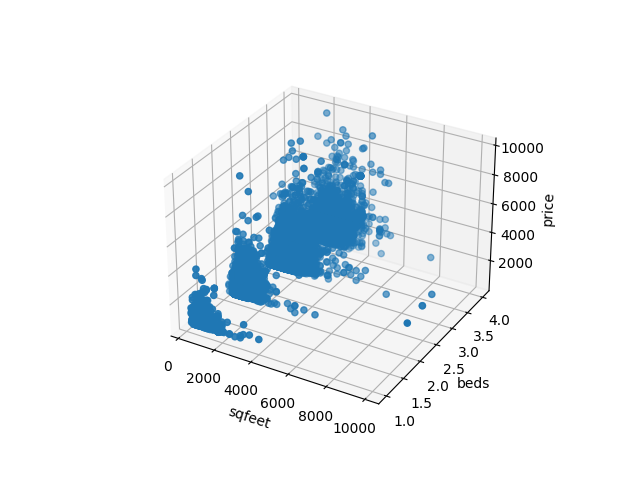

In [14]:
# 3 a 3d plot of price vs sqfeet vs beds
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1['sqfeet'], df1['beds'], df1['price'])
ax.set_xlabel('sqfeet')
ax.set_zlabel('price')
ax.set_ylabel('beds')
plt.show()


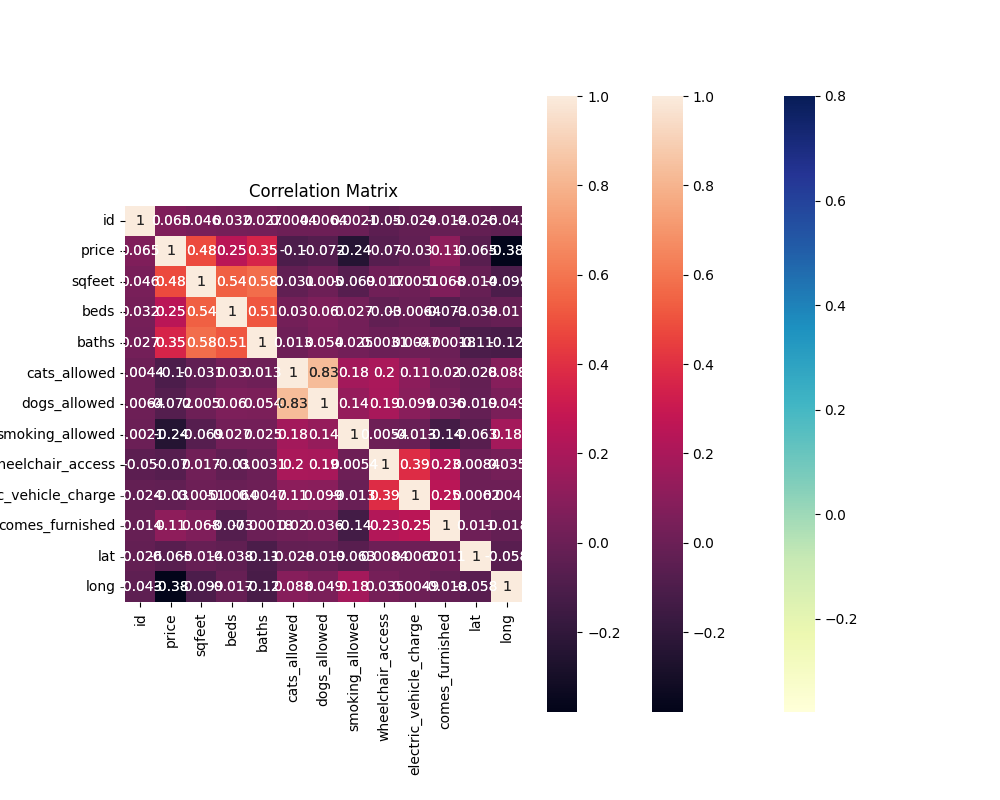

In [17]:
# heatmap of correlation between variables
corr = df1.corr()
sns.heatmap(corr, annot=True)
plt.show()
